# NIPS 2017 Figure 5

In [1]:
%run -i NIPS2017.ipynb

# FIGURE and GRID
FIG_HEIGHT_MM = 40
FIG_WIDTH_MM = FIG_WIDTH_MM
FIG_N_ROWS = 1
ROW_1_NCOLS = 3
ROW_1_HEIGHT_MM = FIG_HEIGHT_MM / FIG_N_ROWS
ROW_1_WIDTH_COL_1_MM = FIG_WIDTH_MM / ROW_1_NCOLS
ROW_1_WIDTH_COL_2_MM = FIG_WIDTH_MM / ROW_1_NCOLS
ROW_1_WIDTH_COL_3_MM = FIG_WIDTH_MM / ROW_1_NCOLS

# PATHS
PANEL_A = PATH_DROPBOX_FIGS + 'fig5_a.svg'
PANEL_B = PATH_DROPBOX_FIGS + 'fig5_b.svg'
PANEL_C = PATH_DROPBOX_FIGS + 'fig5_c.svg'

## Row 1

Data for panels A

In [ ]:
from lfmods.hh import HHSimulator

sim = HHSimulator(seed=100,pilot_samples=0.,cached_sims=False, cached_pilot=False, step_current=False)

# ground-truth parameters
true_params = sim.true_params
n_params = sim.n_params

init = sim.init
t = sim.t
dt = sim.dt
duration = np.max(t)
I = sim.I_obs

# prior over parameters
sim_prior = sim.sim_prior
sim_prior()
prior_min = sim.prior_min
prior_max = sim.prior_max

# if parameters in transformed space, inverse transform function
param_invtransform = sim.param_invtransform
bm = sim.bm

# simulate trace with spikes
fact = 1.
new_prior_min = fact*prior_min
new_prior_max = fact*prior_max
np.random.seed(123)
z = np.random.rand(n_params)
params = param_invtransform( np.multiply(new_prior_max - new_prior_min,z) + new_prior_min )
hh = bm.HH(init, params.reshape(1,-1),seed=230)
states_spikes = hh.sim_time(dt, t, I)[:,0]

Results for panel C

In [3]:
prefix = 'shrinkv4_f8fc02dd'  # ours

dists, infos, losses, nets, posteriors, sims = io.load_prefix(dirs['dir_nets_hh'], prefix, no_net=True)
sim = io.last(sims)
obs_stats = sim.obs
y_obs = sim.obs_trace.reshape(-1,1)
gt = sim.true_params
num_param_inf = len(gt)
labels_params = sim.labels_params
posterior = io.last(posteriors)

### Panel A

In [ ]:
fig_inches = (SCALE_IN*mm2inches(0.9*ROW_1_WIDTH_COL_1_MM), SCALE_IN*mm2inches(0.95*ROW_1_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)


with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    ax = plt.subplot(gs[0])
    plt.plot(t, y_obs, color = COL['GT'], lw=2, label='')
    plt.ylabel('voltage (mV)')
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')

    ax.set_xticks([])
    ax.set_yticks([-80, -20, 40])

    ax = plt.subplot(gs[1])
    plt.plot(t,I*A_soma*1e3,'r', lw=2)
    plt.xlabel('time (ms)')
    plt.ylabel('input (nA)')

    ax.set_xticks([0, duration/2, duration])
    ax.set_yticks([0, 1.1*np.max(I*A_soma*1e3)])
    ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
    
    plt.savefig(PANEL_A, facecolor=plt.gcf().get_facecolor(), transparent=True)  # the figure is saved as svg
    plt.close()

svg(PANEL_A)

panel = st.fromfile(PANEL_A)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

### Panel B

Will be done in illustrator/omnigraffle

In [ ]:
try:
    svg(PANEL_B)
except:
    pass

print('width : {:g}mm'.format(ROW_1_WIDTH_COL_1_MM))
print('height : {:g}mm'.format(ROW_1_HEIGHT_MM))

### Panel C

Posterior view, marginals only

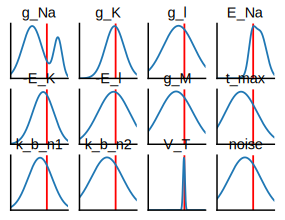

size of svg : ('285pt', '220pt')
aspect ratio : 1.2954545454545454
desired ratio : 1.3333333333333335


In [14]:
%run -i NIPS2017.ipynb

fig_inches = (SCALE_IN*mm2inches(ROW_1_WIDTH_COL_1_MM), SCALE_IN*mm2inches(0.95*ROW_1_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):

    shared_kwargs = {}
    shared_kwargs['figsize'] = fig_inches
    shared_kwargs['diag_only'] = True
    shared_kwargs['diag_only_rows'] = 3
    shared_kwargs['diag_only_cols'] = 4
    shared_kwargs['labels_params'] = sim.labels_params
    shared_kwargs['lims'] = np.array((sim.prior_min, sim.prior_max)).T
    shared_kwargs['gt'] = np.log(sim.true_params)
    fig, ax = plot_pdf(posterior, **shared_kwargs)
    
    plt.savefig(PANEL_C, facecolor=plt.gcf().get_facecolor(), transparent=True)
    plt.close()
    
svg(PANEL_C)

panel = st.fromfile(PANEL_C)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

## Compose figure

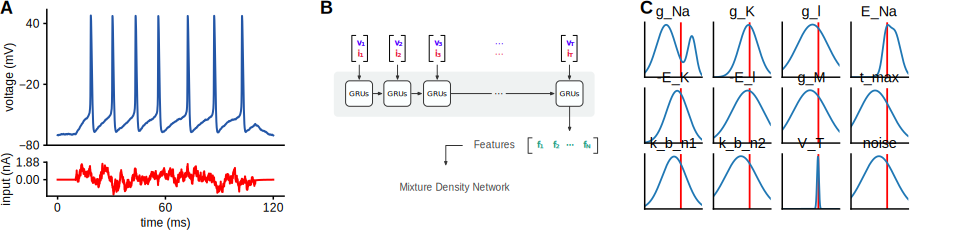

In [15]:
fig = create_fig(FIG_WIDTH_MM, FIG_HEIGHT_MM)

yoffset = -1.2
xoffset = -1.
fig = add_svg(fig, PANEL_A, 0 + xoffset, 0 + yoffset + 1)
fig = add_svg(fig, PANEL_B, ROW_1_WIDTH_COL_1_MM + xoffset, 0 + 1.3 + yoffset, scale=0.5)
fig = add_svg(fig, PANEL_C, ROW_1_WIDTH_COL_1_MM + ROW_1_WIDTH_COL_2_MM + xoffset, 0 + yoffset + 1)

yoffset   = 2.3
fig = add_label(fig, 'A', 0, yoffset)
fig = add_label(fig, 'B', ROW_1_WIDTH_COL_1_MM, yoffset)
fig = add_label(fig, 'C', ROW_1_WIDTH_COL_1_MM + ROW_1_WIDTH_COL_2_MM, yoffset)

if False:
    fig = add_grid(fig, 2, 2)
    fig = add_grid(fig, 160/3, 10, font_size_px=0.0001)

PATH_SVG = PATH_DROPBOX_FIGS + 'fig5.svg'
fig.save(PATH_SVG)

svg(PATH_SVG)

!$INKSCAPE --export-pdf $PATH_DROPBOX_FIGS/fig5.pdf $PATH_SVG